In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

/Users/finleywalden/opt/anaconda3/envs/finalProj/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('divorce/divorce.csv', sep=';')

In [4]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [5]:
corr = df.corr()

<AxesSubplot:>

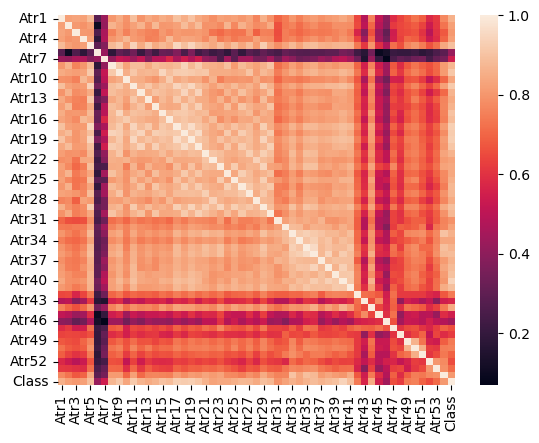

In [6]:
sns.heatmap(corr)

In [7]:
corr = corr['Class']

In [8]:
corr.sort_values(ascending=False)

Class    1.000000
Atr40    0.938684
Atr17    0.929346
Atr19    0.928627
Atr18    0.923208
Atr11    0.918386
Atr9     0.912368
Atr20    0.907008
Atr15    0.901220
Atr39    0.896180
Atr41    0.894356
Atr5     0.893180
Atr29    0.892954
Atr36    0.886497
Atr16    0.886260
Atr38    0.883311
Atr30    0.874531
Atr26    0.872868
Atr27    0.869788
Atr8     0.869569
Atr12    0.868983
Atr21    0.864519
Atr14    0.864316
Atr37    0.863597
Atr35    0.862624
Atr33    0.861328
Atr1     0.861324
Atr25    0.857052
Atr44    0.847336
Atr28    0.846606
Atr13    0.844743
Atr24    0.839392
Atr23    0.837504
Atr34    0.835167
Atr10    0.834897
Atr32    0.829056
Atr22    0.825938
Atr2     0.820774
Atr4     0.819583
Atr54    0.806765
Atr3     0.806709
Atr31    0.792607
Atr50    0.755248
Atr49    0.740704
Atr42    0.739629
Atr53    0.711176
Atr51    0.692681
Atr47    0.656409
Atr52    0.651478
Atr48    0.619830
Atr43    0.566242
Atr45    0.546450
Atr7     0.544835
Atr46    0.443465
Atr6     0.420913
Name: Clas

Text(0, 0.5, 'Atr15')

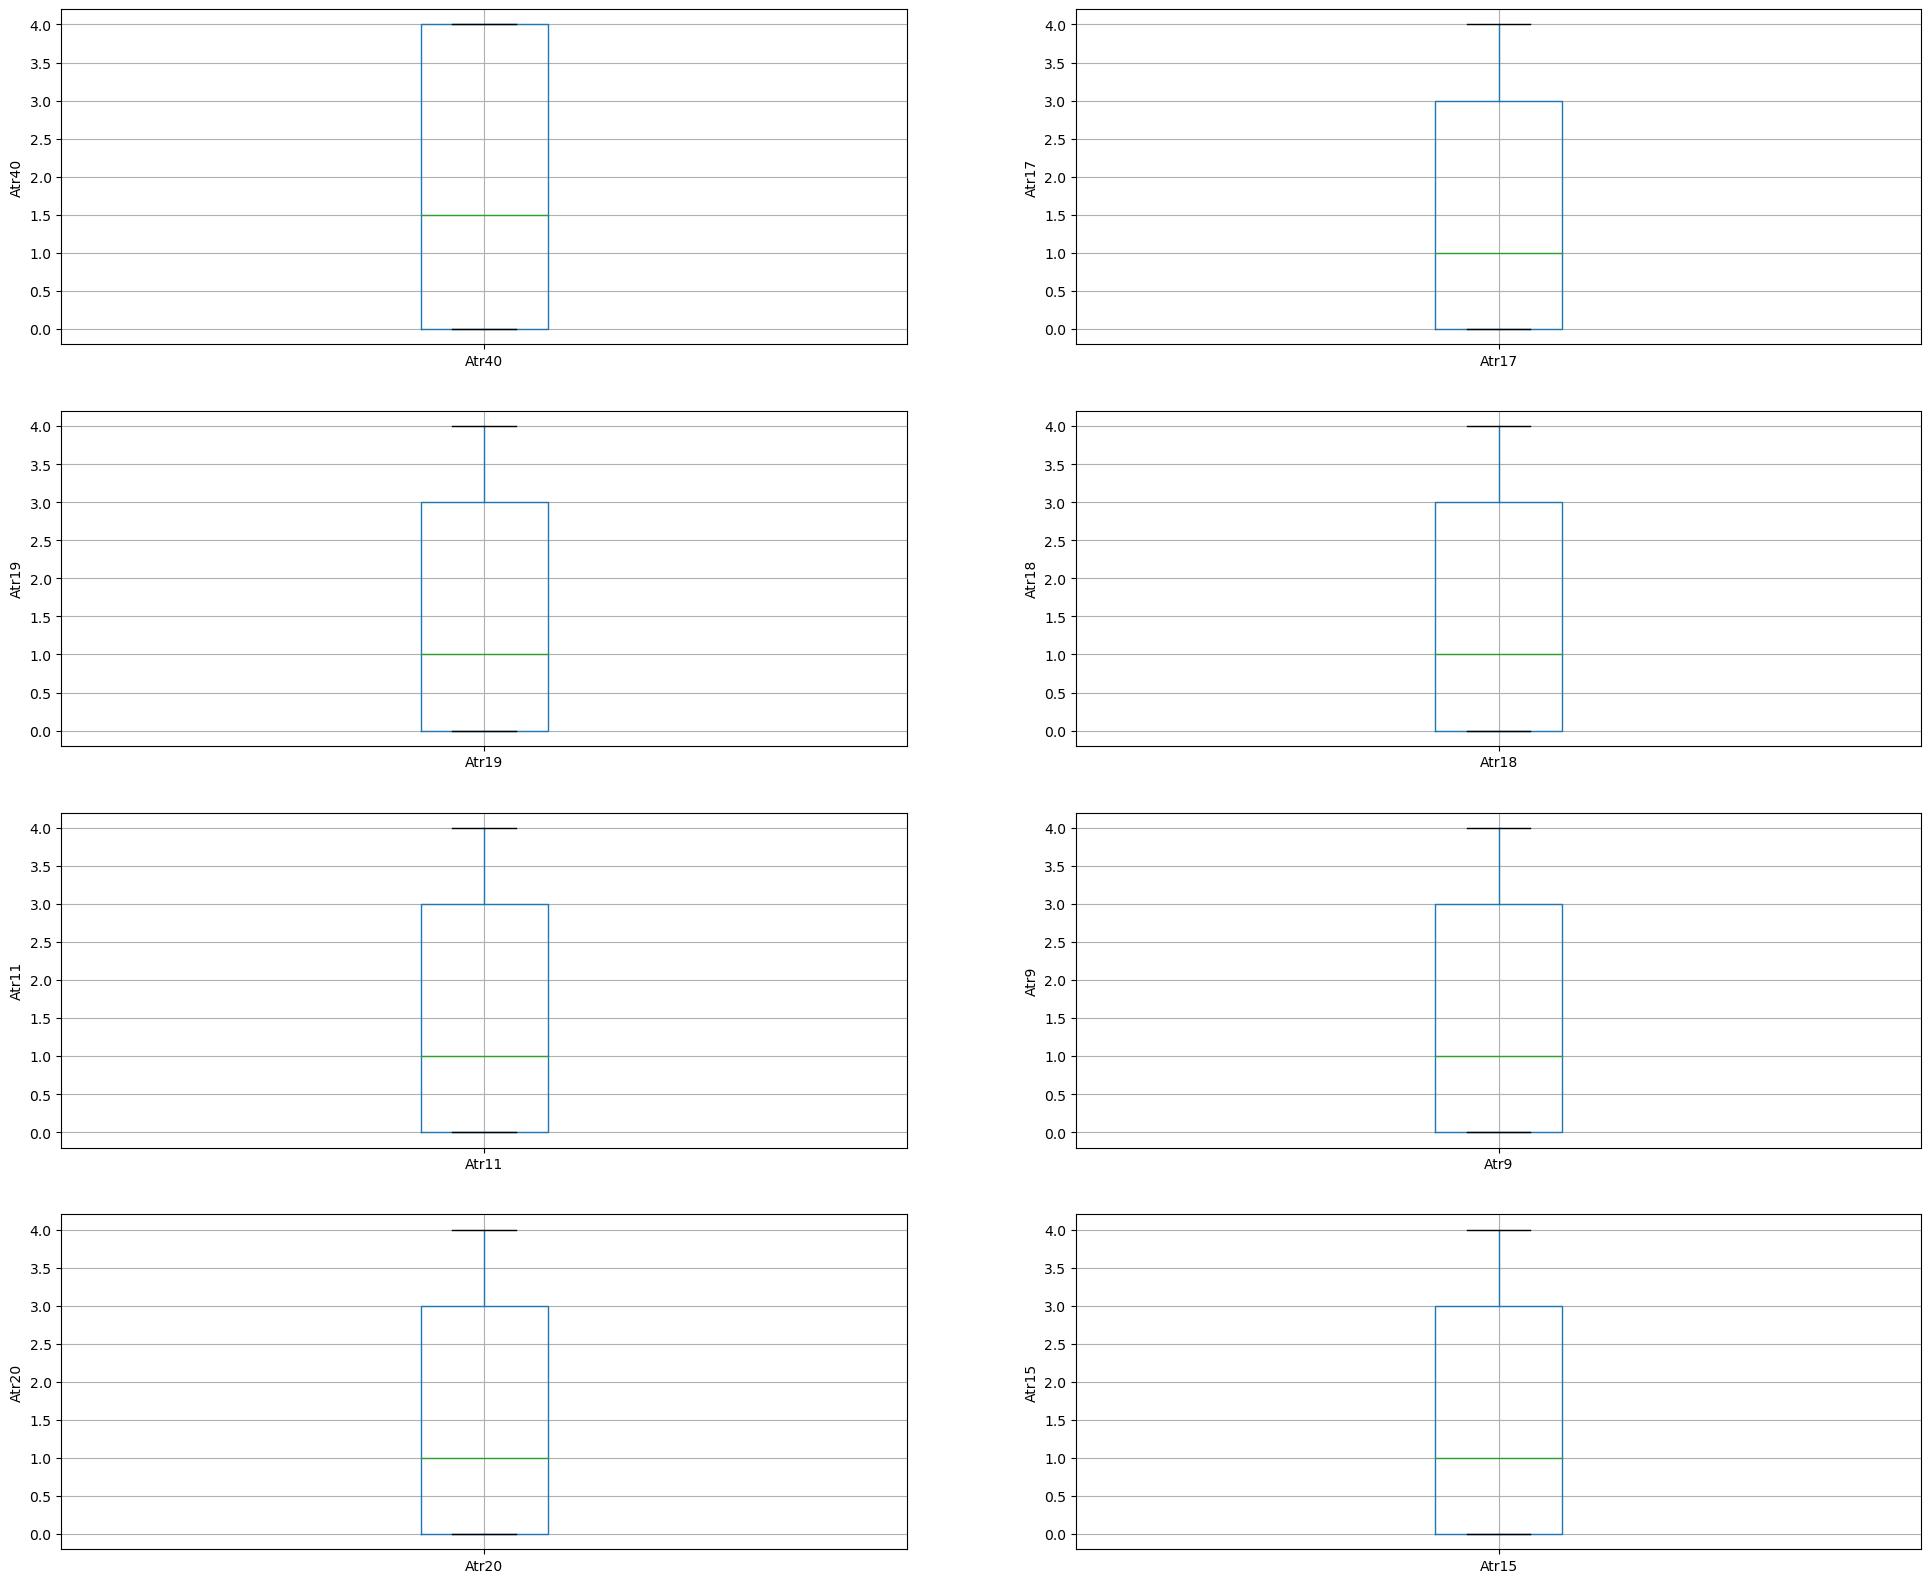

In [9]:
# Visualize data of classes with top 8 correlation
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Atr40')
fig.set_title('')
fig.set_ylabel('Atr40')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='Atr17')
fig.set_title('')
fig.set_ylabel('Atr17')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='Atr19')
fig.set_title('')
fig.set_ylabel('Atr19')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='Atr18')
fig.set_title('')
fig.set_ylabel('Atr18')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='Atr11')
fig.set_title('')
fig.set_ylabel('Atr11')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='Atr9')
fig.set_title('')
fig.set_ylabel('Atr9')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='Atr20')
fig.set_title('')
fig.set_ylabel('Atr20')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='Atr15')
fig.set_title('')
fig.set_ylabel('Atr15')

Text(0, 0.5, '')

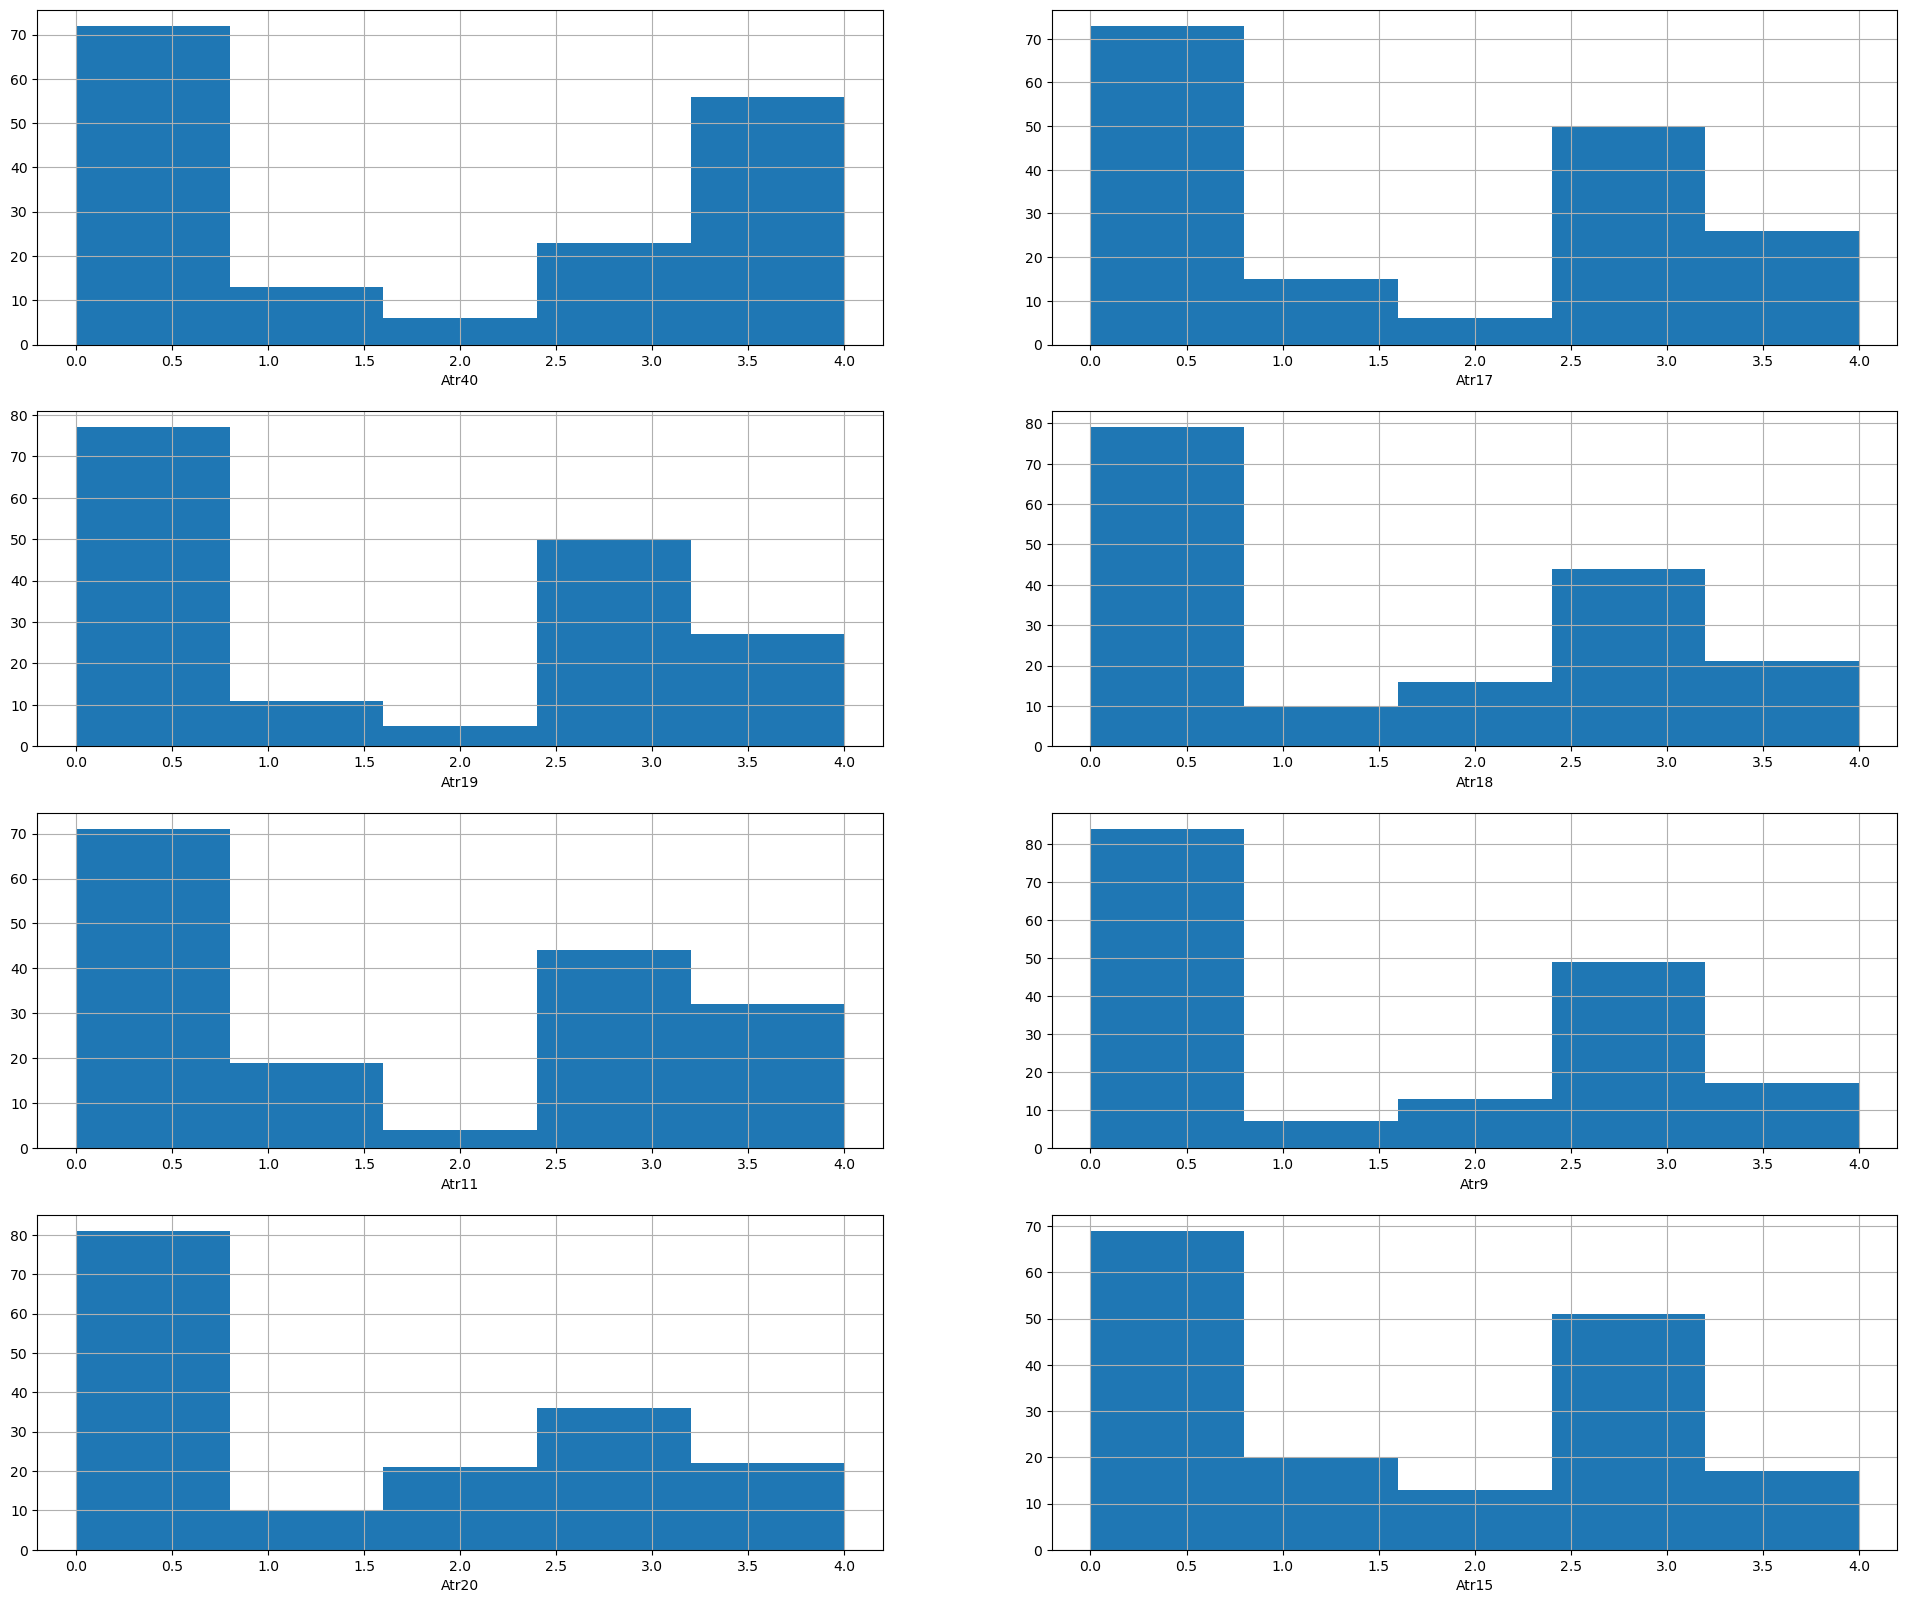

In [10]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Atr40'].hist(bins=5)
fig.set_xlabel('Atr40')
fig.set_ylabel('')

plt.subplot(4, 2, 2)
fig = df['Atr17'].hist(bins=5)
fig.set_xlabel('Atr17')
fig.set_ylabel('')

plt.subplot(4, 2, 3)
fig = df['Atr19'].hist(bins=5)
fig.set_xlabel('Atr19')
fig.set_ylabel('')


plt.subplot(4, 2, 4)
fig = df['Atr18'].hist(bins=5)
fig.set_xlabel('Atr18')
fig.set_ylabel('')


plt.subplot(4, 2, 5)
fig = df['Atr11'].hist(bins=5)
fig.set_xlabel('Atr11')
fig.set_ylabel('')


plt.subplot(4, 2, 6)
fig = df['Atr9'].hist(bins=5)
fig.set_xlabel('Atr9')
fig.set_ylabel('')


plt.subplot(4, 2, 7)
fig = df['Atr20'].hist(bins=5)
fig.set_xlabel('Atr20')
fig.set_ylabel('')

plt.subplot(4, 2, 8)
fig = df['Atr15'].hist(bins=5)
fig.set_xlabel('Atr15')
fig.set_ylabel('')

In [11]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [12]:
X

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,1,1,4,2,2,2
166,0,0,0,0,0,0,0,0,0,0,...,3,4,1,2,2,2,2,3,2,2
167,1,1,0,0,0,0,0,0,0,1,...,2,3,0,2,0,1,1,3,0,0
168,0,0,0,0,0,0,0,0,0,0,...,4,3,3,2,2,3,2,4,3,1


In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Class, Length: 170, dtype: int64

In [16]:
models = []
names = []

In [17]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier


svc1 = SVC(kernel = 'rbf', C=100, probability=True)

svc2 = SVC(kernel = 'linear', probability=True)

models.append(svc1)
models.append(svc2)
names.append('SVM - RBF, C = 100')
names.append('SVM - Linear')

dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=9, min_samples_split=10)

models.append(dt)
names.append('Decision Tree')

# This one
svc3 = LinearSVC(C=20.0, dual=True, loss='hinge', penalty='l2', tol=0.1)
ccc = CalibratedClassifierCV(svc3)
models.append(ccc)
names.append("Linear SVC")

# This one
mlp = MLPClassifier(alpha=0.01, learning_rate_init=1.0)
models.append(mlp)
names.append('Multi-Level Perceptron Classifier')




In [37]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [38]:
X = X[['Atr40', 'Atr17', 'Atr19', 'Atr18']]#, 'Atr11']]#, 'Atr9', 'Atr20', 'Atr15']]

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [164]:
ac = 0
vals = evalModels(models, 100) 
for i in vals:
    ac += i[0]
ac /= len(vals)
print(ac)

/Users/finleywalden/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9655882352941163


In [18]:
def evalModels(models, n = 1):
    vals = []
    for i in range(len(models)):
        vals.append([0, 0])
    for j in range(n):
        for i in range(len(models)): 
            model = models[i]
            name = names[i]

            X = df.drop(['Class'], axis=1)
            Y = df['Class']
            
            X = X[['Atr40', 'Atr17', 'Atr19', 'Atr18']]#, 'Atr11', 'Atr9', 'Atr20', 'Atr15']]
            
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
            
            model.fit(X_train, Y_train)

            Y_pred = model.predict(X_test)
            

            ac = accuracy_score(Y_test, Y_pred)

            f1 = f1_score(Y_test, Y_pred)
            
            vals[i][0]+= ac
            vals[i][1] += f1
            
            if n == 1:
                cm = confusion_matrix(Y_test, Y_pred)
                sns.heatmap(cm, annot=True, fmt=".0f")
                plt.xlabel('Predicted Values')
                plt.ylabel('Actual Values')
                plt.title('Accuracy Score: {0}'.format(ac), size = 15)
                plt.show()
            #print("Accuracy score for " + name + ": " + str(ac))
            #Y_proba = model.predict_proba(X_test)
            #print(Y_proba)

#             cm = confusion_matrix(Y_test, Y_pred)
#             sns.heatmap(cm, annot=True, fmt=".0f")
#             plt.xlabel('Predicted Values')
#             plt.ylabel('Actual Values')
#             plt.title('Accuracy Score: {0}'.format(ac), size = 15)
#             plt.show()
    for i in vals:
        i[0] /= n
        i[1] /= n
    return vals

In [19]:
vals = evalModels(models, 100)
for i in range(len(models)):
    ac = vals[i][0]
    f1 = vals[i][1]
    name = names[i]
    print("Accuracy score for " + name + ": " + str(ac))
    print("F1 score for " + name + ": " + str(f1))
    print()


Accuracy score for SVM - RBF, C = 100: 0.9705882352941163
F1 score for SVM - RBF, C = 100: 0.965517241379312

Accuracy score for SVM - Linear: 0.9705882352941163
F1 score for SVM - Linear: 0.965517241379312

Accuracy score for Decision Tree: 0.9411764705882331
F1 score for Decision Tree: 0.9285714285714296

Accuracy score for Linear SVC: 0.9411764705882331
F1 score for Linear SVC: 0.9285714285714296

Accuracy score for Multi-Level Perceptron Classifier: 0.9764705882352932
F1 score for Multi-Level Perceptron Classifier: 0.9738368027967588



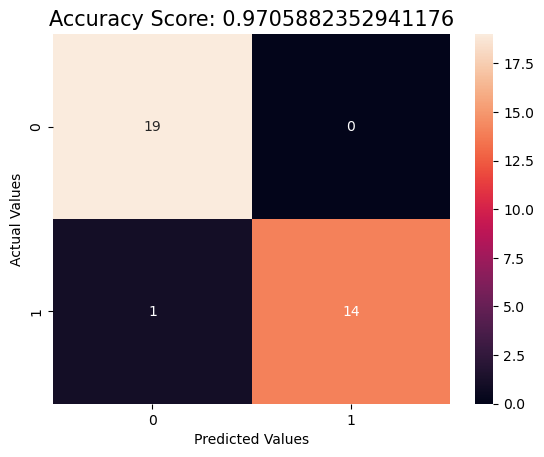

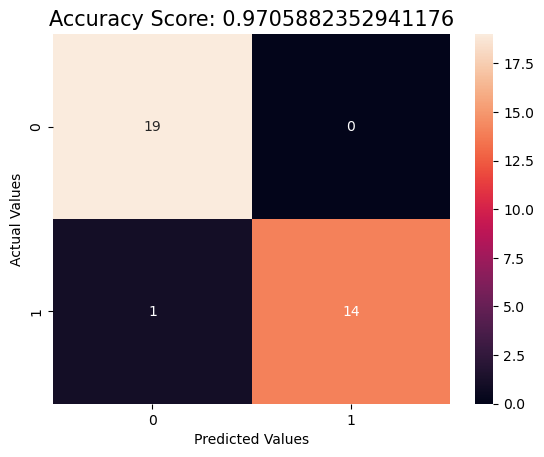

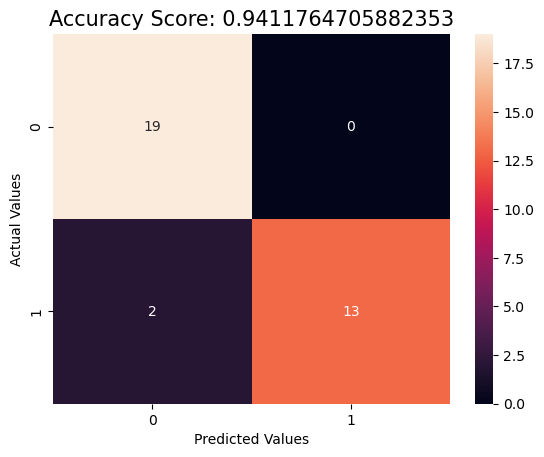

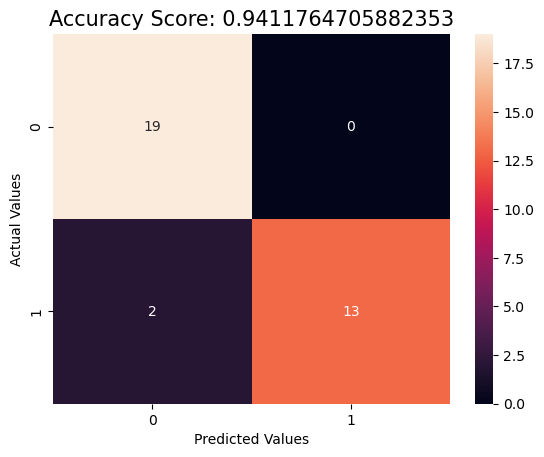

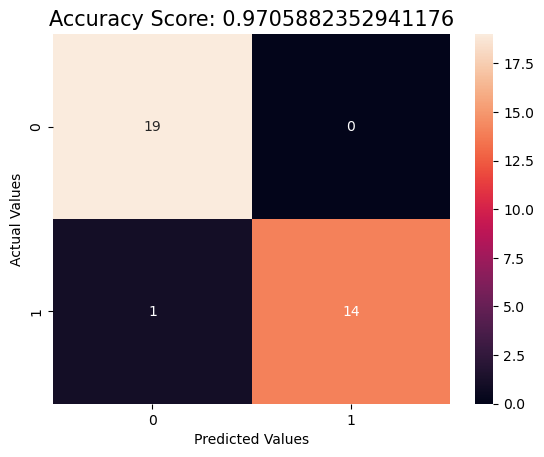

Accuracy score for SVM - RBF, C = 100: 0.9705882352941176
F1 score for SVM - RBF, C = 100: 0.9655172413793104

Accuracy score for SVM - Linear: 0.9705882352941176
F1 score for SVM - Linear: 0.9655172413793104

Accuracy score for Decision Tree: 0.9411764705882353
F1 score for Decision Tree: 0.9285714285714286

Accuracy score for Linear SVC: 0.9411764705882353
F1 score for Linear SVC: 0.9285714285714286

Accuracy score for Multi-Level Perceptron Classifier: 0.9705882352941176
F1 score for Multi-Level Perceptron Classifier: 0.9655172413793104



In [21]:
vals = evalModels(models)
for i in range(len(models)):
    ac = vals[i][0]
    f1 = vals[i][1]
    name = names[i]
    print("Accuracy score for " + name + ": " + str(ac))
    print("F1 score for " + name + ": " + str(f1))
    print()

In [22]:
joblib.dump(mlp, "MLP_Model.sav")

['MLP_Model.sav']

In [44]:
# Best model: Multi-Level Perceptron Classifier
mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)
Y_proba = mlp.predict_proba(X_test)

In [45]:
ac = accuracy_score(Y_test, Y_pred)

print("Accuracy score: " + str(ac))

Accuracy score: 0.9705882352941176


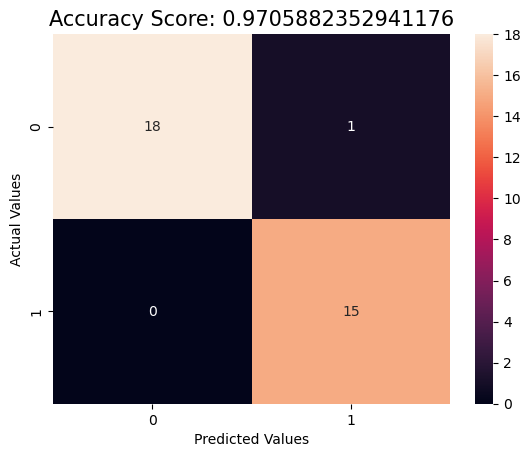

In [46]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(ac), size = 15)
plt.show()

In [47]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred)

In [48]:
print(f1)

0.967741935483871


In [56]:
features = {
        'Atr40': 0,
        'Atr17': 4,
        'Atr19': 4,
        'Atr18': 4
}
    
data = pd.DataFrame(features,index=[0])

In [57]:
testOut = mlp.predict(data)[0]

In [58]:
print(testOut)

1


In [59]:
X

,Atr40,Atr17,Atr19,Atr18
0,3,0,0,0
1,4,4,3,4
2,3,3,3,3
3,4,3,3,3
4,1,1,2,1
...,...,...,...,...
165,0,0,0,0
166,1,0,0,0
167,2,0,0,0
168,1,0,0,0


In [64]:
X = df[['Atr40', 'Atr17', 'Atr19', 'Atr18', 'Class']]

In [65]:
with pd.option_context('display.max_rows', None,):
   print(X)

     Atr40  Atr17  Atr19  Atr18  Class
0        3      0      0      0      1
1        4      4      3      4      1
2        3      3      3      3      1
3        4      3      3      3      1
4        1      1      2      1      1
5        2      2      0      1      1
6        3      3      3      3      1
7        4      2      2      3      1
8        2      3      3      3      1
9        2      1      1      2      1
10       4      4      4      4      1
11       4      4      4      4      1
12       4      3      3      4      1
13       4      3      3      4      1
14       4      3      3      4      1
15       4      4      4      4      1
16       4      4      4      4      1
17       3      4      4      4      1
18       4      3      3      3      1
19       3      4      4      4      1
20       4      4      4      3      1
21       4      4      4      3      1
22       3      3      3      4      1
23       4      3      3      3      1
24       4      4      4 

In [68]:
import streamlit as st
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import joblib
import sklearn

In [76]:
np.__version__

'1.23.4'